### **Access the srtm dem data and tandem data. And projected the data to utm projection (!!to do).**

In [2]:
import os
os.chdir('..')
import config
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.get_dem import get_dem
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.lay_stack import lay_stack


### **Download SRTM DEM**
#### This data is acquired at 2000. and we download the data with <u>WGS84 ellipsoid</u>

In [8]:
## configuration
region_bounds = (80.118, 34.907, 81.941, 35.852)     # rgi13_05
path_srtm_c = config.root_proj + '/data/dem_data/srtm-c/SRTMGL1_E_wkunlun.tif'
# epsg_code = '32644'


In [4]:
get_dem(demtype='SRTMGL1_E', bounds=region_bounds, \
                        apikey='7f97d1b49489d7c0e346b085772aef3c', path_out=path_srtm_c)


https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1_E&west=80.118&south=34.907&east=81.941&north=35.852&outputFormat=GTiff&API_Key=7f97d1b49489d7c0e346b085772aef3c
DEM data have been downloaded!


#### Reprojection

In [6]:
### 1. wgs84 to utm projection
path_srtm_c_utm = config.root_proj + '/data/dem_data/srtm-c/SRTMGL1_E_wkunlun_utm.tif'
command_line = 'gdalwarp  -overwrite -s_srs EPSG:4326 -t_srs EPSG:32644 -tr 30 30 -r cubic -co COMPRESS=LZW -co TILED=YES ' +\
                path_srtm + ' ' + path_srtm_utm
print(os.popen(command_line).read())



srtm_c_info: {'geoextent': (80.11791666670115, 81.94097222225695, 34.90708333333, 35.85208333333013), 'geotrans': (80.11791666670115, 0.00027777777777781464, 0.0, 35.85208333333013, 0.0, -0.00027777777777781464), 'geosrs': '4326', 'row': 3402, 'col': 6563, 'bands': 1}
srtm_c_utm_info: {'geoextent': (419416.44565371965, 585976.4456537196, 3862741.200990109, 3967951.200990109), 'geotrans': (419416.44565371965, 30.0, 0.0, 3967951.200990109, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 1}


Text(0.5, 1.0, 'wgs84 utm projected')

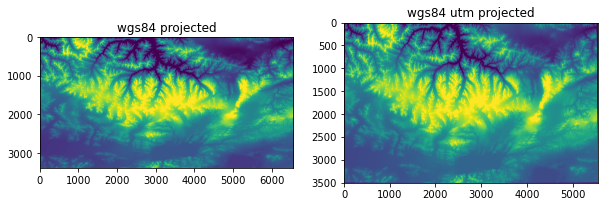

In [10]:
srtm_c, srtm_c_info = readTiff(path_srtm_c)
srtm_c_utm, srtm_c_utm_info = readTiff(path_srtm_c_utm)
print('srtm_c_info:',srtm_c_info); print('srtm_c_utm_info:', srtm_c_utm_info)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); imgShow(srtm_c); plt.title('wgs84 projected')
plt.subplot(1,2,2); imgShow(srtm_c_utm); plt.title('wgs84 utm projected')


### **Download SRTM-X DEM**
#### This data is acquired at 2000, and can be downloaded from: https://download.geoservice.dlr.de/SRTM_XSAR, the downloaded data with <u>WGS84 ellipsoid</u>.

### Read in data

In [11]:
path_srtm_x_utm = config.root_proj + '/data/dem_data/srtm-x/srtm_x_utm.tif'
srtm_x_utm, srtm_x_utm_info = readTiff(path_srtm_x_utm)
print(srtm_x_utm_info)


{'geoextent': (419391.61130260024, 585919.5646253139, 3862794.8176692203, 3967981.5287141944), 'geotrans': (419391.61130260024, 26.508747743189044, 0.0, 3967981.5287141944, 0.0, -26.508747743189044), 'geosrs': '32644', 'row': 3968, 'col': 6282, 'bands': 1}


### **Download TanDEM-X 90 DEM**
#### This data is acquired at ~2012. and with <u>WGS84 ellipsoid</u>


In [4]:
### It is convenient to download from website directly.
### website: https://download.geoservice.dlr.de/TDM90/#download
### or: 
### 1) download the tdm90-url-list.txt and 2)
### !curl $(printf ' -O %s' $(<TDM90-url-list.txt)) -u 'xinluo_xin@163.com:XmRLpX5y5fB3A_j'


zsh:1: no such file or directory: TDM90-url-list.txt
curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


#### Reprojection for tandem data

In [13]:
path_tandem = config.root_proj + '/data/dem_data/tandem-x/tandem_wkunlun.tif'
path_tandem_utm = config.root_proj + '/data/dem_data/tandem-x/tandem_wkunlun_utm.tif'
command_line = 'gdalwarp  -overwrite -s_srs EPSG:4979 -t_srs EPSG:32644 -tr 30 30 -r cubic -co COMPRESS=LZW -co TILED=YES ' +\
                path_tandem + ' ' + path_tandem_utm
print(os.popen(command_line).read())


tandem_info: {'geoextent': (80.118, 81.941, 34.907, 35.852), 'geotrans': (80.118, 0.0008331809872029284, 0.0, 35.852, 0.0, -0.0008333333333333336), 'geosrs': '4979', 'row': 1134, 'col': 2188, 'bands': 1}
tandem_utm_info: {'geoextent': (419423.97743896896, 585923.977438969, 3862731.9820688833, 3967941.9820688833), 'geotrans': (419423.97743896896, 30.0, 0.0, 3967941.9820688833, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5550, 'bands': 1}


Text(0.5, 1.0, 'wgs84 utm projected')

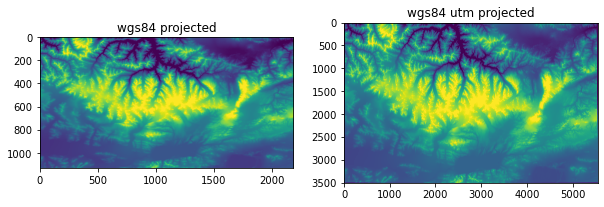

In [15]:
tandem, tandem_info = readTiff(path_tandem)
tandem_utm, tandem_utm_info = readTiff(path_tandem_utm)
print('tandem_info:',tandem_info); print('tandem_utm_info:', tandem_utm_info)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); imgShow(tandem); plt.title('wgs84 projected')
plt.subplot(1,2,2); imgShow(tandem_utm); plt.title('wgs84 utm projected')


#### **Dem data check: SRTM-C, SRTM-X and TanDEM-X.**

### Layer stacking for the srtm dem and tandem data

In [16]:
path_laystack =  config.root_proj + '/data/dem_data/srtm_tandem_laystack.tif'
lay_stack(path_imgs=[path_srtm_c_utm, path_srtm_x_utm, path_tandem_utm], path_out=path_laystack)



In [17]:
### read in remote sensing image
path_img_utm = config.root_proj + '/data/rsimg/l8_kunlun_20200914_utm.tif'
img_utm, img_utm_info = readTiff(path_img_utm)
print(img_utm_info)


{'geoextent': (419403.84614682785, 585963.8461468278, 3862785.3229942983, 3967995.3229942983), 'geotrans': (419403.84614682785, 30.0, 0.0, 3967995.3229942983, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 6}


dems_info: {'geoextent': (419416.44565371965, 585976.4456537196, 3862741.200990109, 3967951.200990109), 'geotrans': (419416.44565371965, 30.0, 0.0, 3967951.200990109, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 3}


Text(0.5, 1.0, 'L8 image')

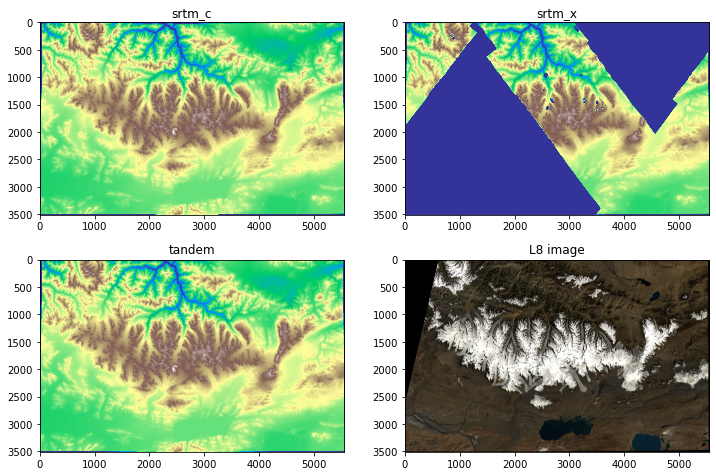

In [22]:
dems, dems_info = readTiff(path_laystack)
print('dems_info:', dems_info)
plt.figure(figsize=(12,8))
plt.subplot(2,2,1); plt.imshow(dems[:,:,0], vmin=4000, vmax=7000, cmap='terrain'); plt.title('srtm_c')
plt.subplot(2,2,2); plt.imshow(dems[:,:,1], vmin=4000, vmax=7000, cmap='terrain'); plt.title('srtm_x')
plt.subplot(2,2,3); plt.imshow(dems[:,:,2], vmin=4000, vmax=7000, cmap='terrain'); plt.title('tandem')
plt.subplot(2,2,4); imgShow(img_utm, color_bands=[2,1,0]); plt.title('L8 image')

